In [39]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [40]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [41]:
# Категориальные: was_mwrried, sex, profession, drive_info. Остальные численные.
# Нормальное распределение только у happyness
# drive_info - нет почти полофвины данных
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


<Axes: ylabel='Frequency'>

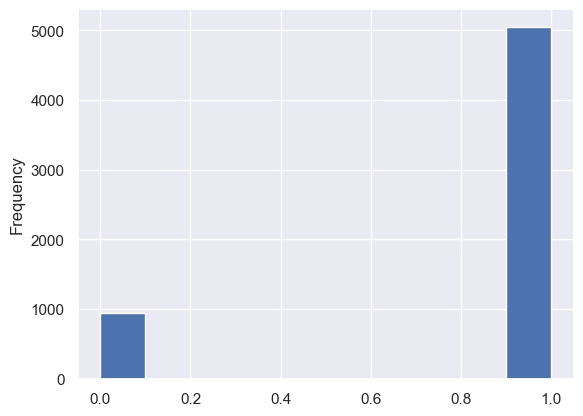

In [42]:
data['was_married'].plot.hist()


<Axes: ylabel='Frequency'>

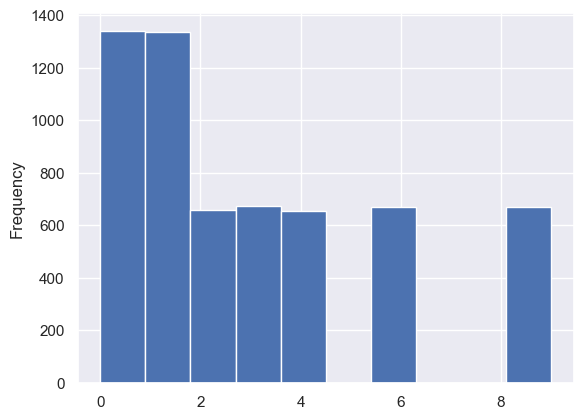

In [43]:
data['children'].plot.hist()


<Axes: ylabel='Frequency'>

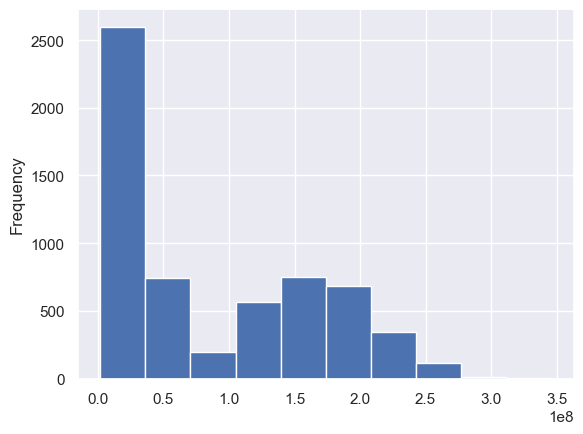

In [44]:
data['salary'].plot.hist()


<Axes: ylabel='Frequency'>

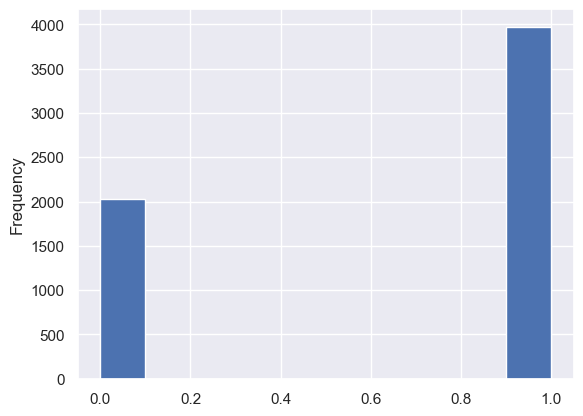

In [37]:
data['sex'].plot.hist()



<Axes: ylabel='Frequency'>

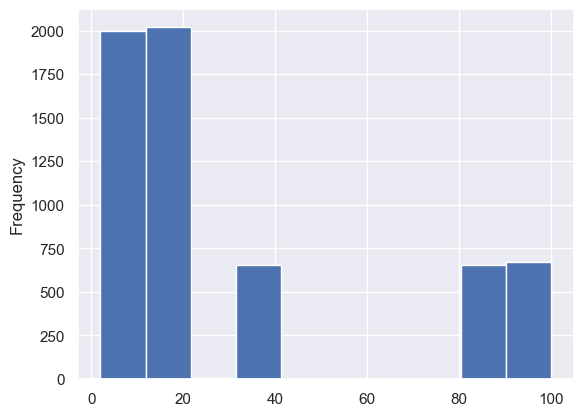

In [38]:
data['age'].plot.hist()

<Axes: ylabel='Frequency'>

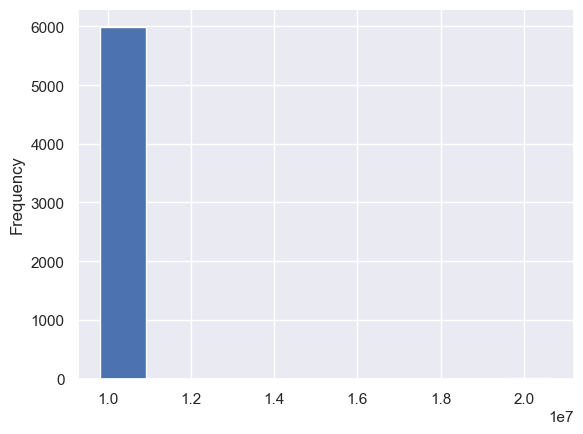

In [46]:
data['home_cost'].plot.hist()

<Axes: ylabel='Frequency'>

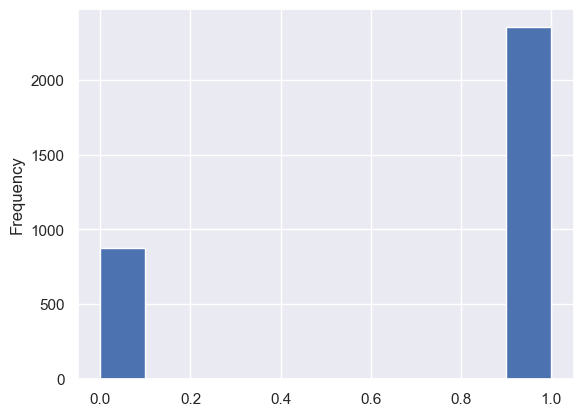

In [47]:
data['drive_info'].plot.hist()

<Axes: ylabel='Frequency'>

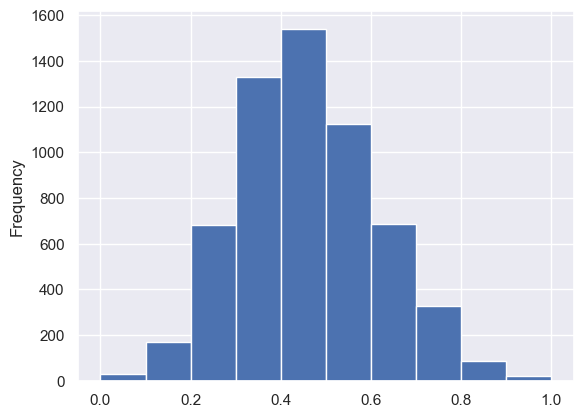

In [48]:
data['happyness'].plot.hist()

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [6]:
data = data.drop_duplicates()
data.info()
#Дубликатов нет


<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [7]:
data = data.dropna()
data.info()

#Удалены пропуски данных

<class 'pandas.core.frame.DataFrame'>
Index: 3230 entries, 1 to 497
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  3230 non-null   int64  
 1   children     3230 non-null   float64
 2   salary       3230 non-null   float64
 3   sex          3230 non-null   int64  
 4   age          3230 non-null   float64
 5   profession   3230 non-null   object 
 6   home_cost    3230 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    3230 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 252.3+ KB


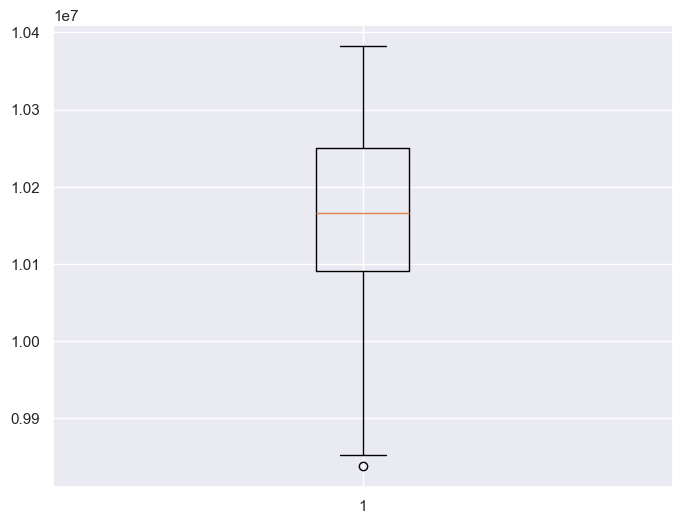

In [8]:
#* Найти и удалить выбросы по признаку `home_cost`. Сколько их?
#data['home_cost'].plot.hist()
plt.figure(figsize=(8, 6))
#plt.boxplot(data['home_cost'],showfliers=False);# не показываем выбросы

#plt.boxplot(data[data['home_cost']<1.8]['home_cost'])
#Наблюдаем три точки выброса, выше значения 1,8
q=data['home_cost'].quantile(0.95)
dataf=data[data['home_cost']<q]
plt.boxplot(dataf['home_cost']);

# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

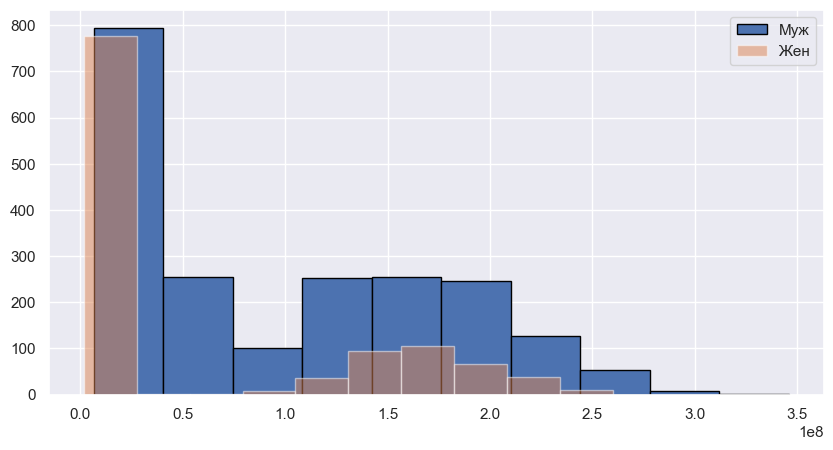

In [9]:
# Ответ - нет. У мужчин  Зп больше
bins=50
plt.figure(figsize=(10, 5))
plt.hist(data[data['sex']==1]['salary'],  alpha=1, edgecolor='black', label='Муж')
plt.hist(data[data['sex']==0]['salary'],  alpha=0.5, label='Жен')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))




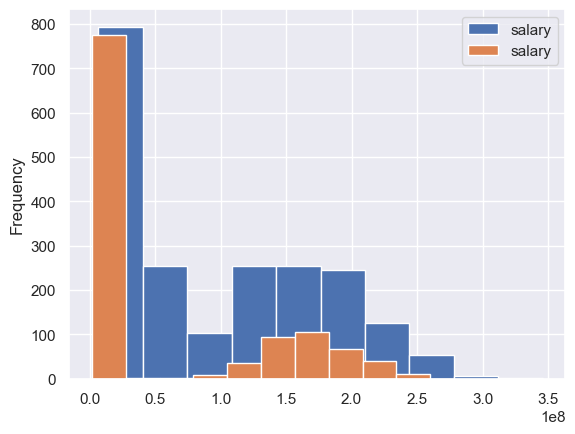

In [10]:
data[data['sex']==1]['salary'].plot.hist().set_label("123")
data[data['sex']==0]['salary'].plot.hist()
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

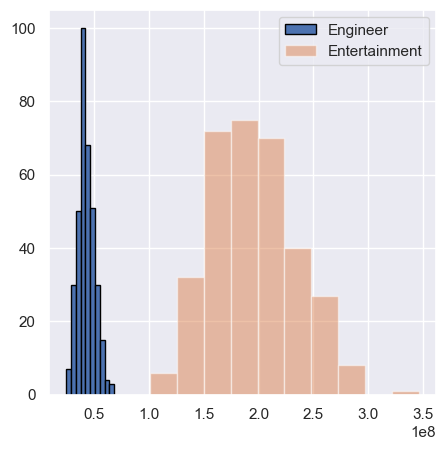

In [11]:
#У инженеров максимум

plt.figure(figsize=(5, 5))
plt.hist(data[data['profession']=='Engineer']['salary'],  alpha=1, edgecolor='black', label='Engineer')
plt.hist(data[data['profession']=='Entertainment']['salary'],  alpha=0.5, label='Entertainment')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

[]

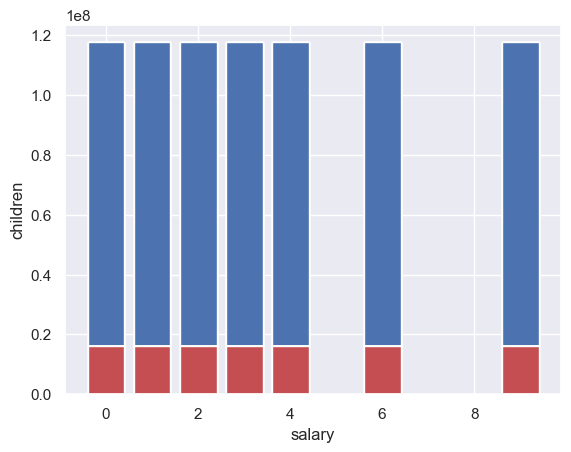

In [12]:
data.groupby('children')
#data[['salary','children']].plot()

plt.bar(data['children'],data[data['children']>3]['salary'].median(), label=">3", color='b')
plt.bar(data['children'],data[data['children']<=3]['salary'].median(), label=">3", color='r')
#plt.bar(x2, y2, label="Green Bar", color='g')
plt.xlabel("salary")
plt.ylabel("children")
plt.plot()




In [13]:
# Да. Те у кого больше 3х детей зарабатываю больше
print(" >3",data[data['children']>3]['salary'].mean().round())
print("<=3",data[data['children']<=3]['salary'].mean().round())


 >3 117448635.0
<=3 66938957.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


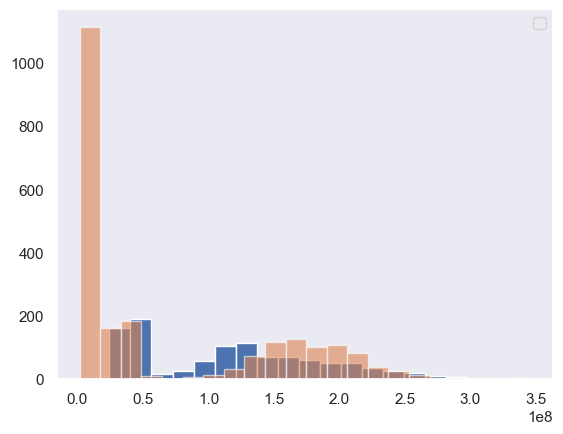

In [14]:
import matplotlib.pyplot as plt
x=data[data['children']>3]['salary']
y=data[data['children']<=3]['salary']
plt.hist(x,20)
plt.hist(y,20,alpha=0.6)
plt.grid()
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


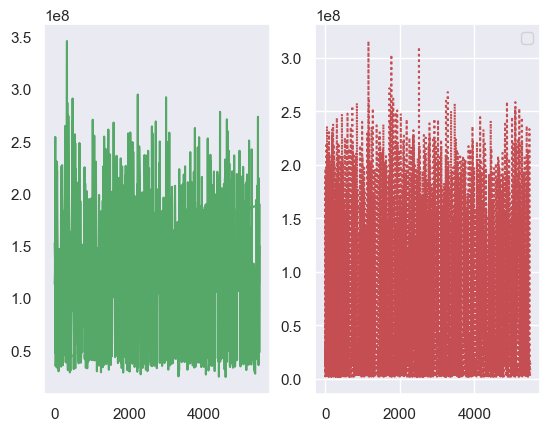

In [15]:
x=data[data['children']>3]['salary']
y=data[data['children']<=3]['salary']
ax1 = plt.subplot(1,2,1)
plt.plot(x,"-g")
ax2 = plt.subplot(1,2,2)
plt.plot(y,':r')
ax1.grid()
plt.legend()
plt.show()


<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

In [16]:
# Художники живут в более дешёвых домах
print("Artist3",data[data['profession']=='Artist']['salary'].mean().round())
print("Lawyer",data[data['profession']=='Lawyer']['salary'].mean().round())

Artist3 120716184.0
Lawyer 168289389.0


<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


In [17]:
# значения примерно одинаковы
print("Был в браке",data[data['was_married']==0]['home_cost'].median().round())
print("не был",data[data['was_married']==1]['home_cost'].median().round())

Был в браке 10276482.0
не был 10151696.0


In [18]:
print("Был в браке",data[data['was_married']==0]['home_cost'].std())
print("не был",data[data['was_married']==1]['home_cost'].std())

Был в браке 87939.85295384045
не был 444091.9698780806


<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [19]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [20]:
# Да. Мужчины бываю чаще в браке.
print(" ******  был в браке | не был в браке |")
print("мужчины",data[(data['sex']==1)&(data['was_married']==1)]['was_married'].count(),"|",data[(data['sex']==1)&(data['was_married']==0)]['was_married'].count())
print("Женщины",data[(data['sex']==0)&(data['was_married']==1)]['was_married'].count(),"|",data[(data['sex']==1)&(data['was_married']==0)]['was_married'].count())

 ******  был в браке | не был в браке |
мужчины 1946 | 145
Женщины 779 | 145


In [22]:
print(data[data['sex']==0]['sex'].count())
print(data[data['sex']==1]['sex'].count())

1139
2091
